<a href="https://colab.research.google.com/github/kzhangaz/GaussianRegression/blob/main/GP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

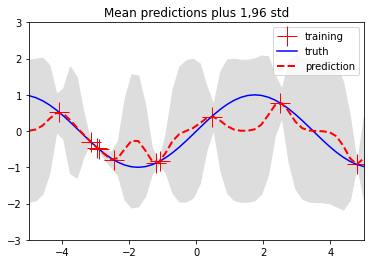

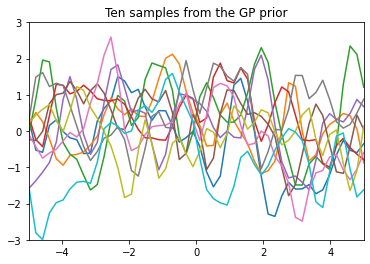

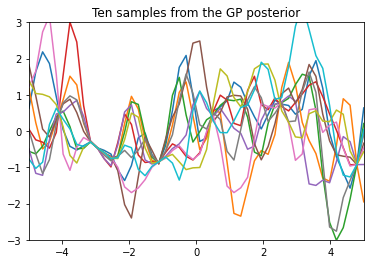

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Underlying truth
f = lambda x: np.sin(0.9*x).flatten()

# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

K = kernel(X, X)
L = np.linalg.cholesky(K + (s**2)*np.eye(N)) # example code: L = np.linalg.cholesky(K + s*np.eye(N))

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest)) # Lk = L^(-1)K(X,X*) (size: N*n)
mu = np.dot(Lk.T, np.linalg.solve(L, y)) # mu = K(X*,X) L^T^(-1) L^(-1)y

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0) # cov = K_ - Lk^T Lk
s = np.sqrt(s2)

# PLOTS:
plt.figure(1)
plt.clf()
plt.plot(X, y, 'r+', ms=20)
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-1.96*s, mu+1.96*s, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
plt.legend(('training','truth','prediction'), loc='upper right')
plt.title('Mean predictions plus 1,96 std')
plt.axis([-5, 5, -3, 3])

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
plt.figure(2)
plt.clf()
plt.plot(Xtest, f_prior)
plt.title('Ten samples from the GP prior')
plt.axis([-5, 5, -3, 3])

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
plt.figure(3)
plt.clf()
plt.plot(Xtest, f_post)
plt.title('Ten samples from the GP posterior')
plt.axis([-5, 5, -3, 3])

plt.show()

